In [1]:
from keras.applications.vgg16 import VGG16
# Load the model
model = VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [2]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

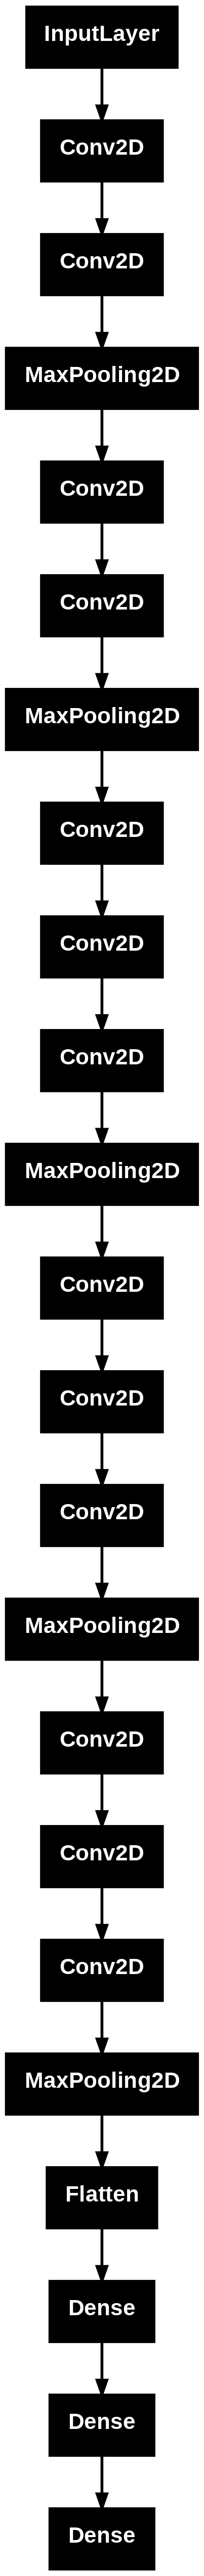

In [3]:
from keras.utils import plot_model
plot_model(model)

In [4]:
for i in range(len(model.layers)):
  # check convolutional layer
  if 'conv' not in model.layers[i].name:
    continue

  # get filter weights
  filters,biases = model.layers[i].get_weights()
  print("layer number",i,model.layers[i].name,filters.shape)

layer number 1 block1_conv1 (3, 3, 3, 64)
layer number 2 block1_conv2 (3, 3, 64, 64)
layer number 4 block2_conv1 (3, 3, 64, 128)
layer number 5 block2_conv2 (3, 3, 128, 128)
layer number 7 block3_conv1 (3, 3, 128, 256)
layer number 8 block3_conv2 (3, 3, 256, 256)
layer number 9 block3_conv3 (3, 3, 256, 256)
layer number 11 block4_conv1 (3, 3, 256, 512)
layer number 12 block4_conv2 (3, 3, 512, 512)
layer number 13 block4_conv3 (3, 3, 512, 512)
layer number 15 block5_conv1 (3, 3, 512, 512)
layer number 16 block5_conv2 (3, 3, 512, 512)
layer number 17 block5_conv3 (3, 3, 512, 512)


In [5]:
# retrieve weights from the second layer
filters,bias = model.layers[1].get_weights()

In [6]:
# normalize filter value to 0-1 so we can visualize them
f_min,f_max = filters.min(),filters.max()
filters = (filters- f_min) / (f_max - f_min)

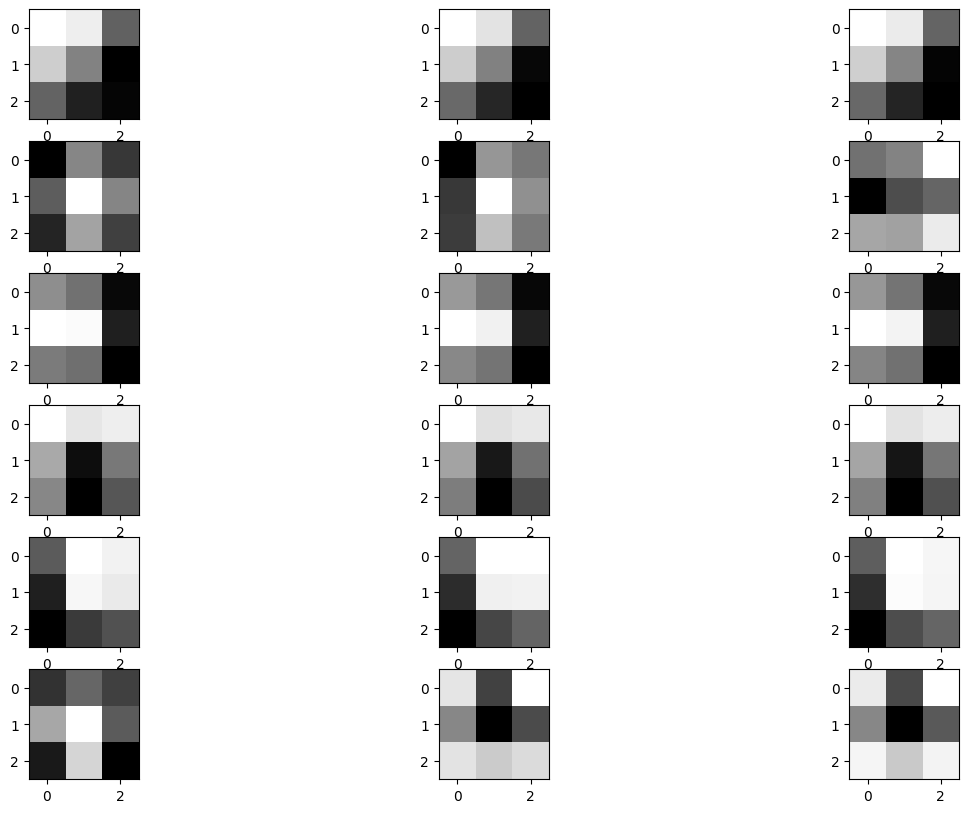

In [7]:
import matplotlib.pyplot as plt
n_filters =6
ix=1
fig = plt.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters
plt.show()

In [8]:
from tensorflow.keras.models import Model

model = Model(inputs = model.inputs, outputs =model.layers[1].output)

In [9]:
from tensorflow.keras.preprocessing import image

In [17]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input  # or other model-specific preprocess
from numpy import expand_dims

# Load the image
img = load_img("/content/vijay2.png", target_size=(224, 224))

# Convert the image to an array
img = img_to_array(img)

# Expand dimensions to match the expected input shape for the model
img = expand_dims(img, axis=0)

# Preprocess the image
img = preprocess_input(img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


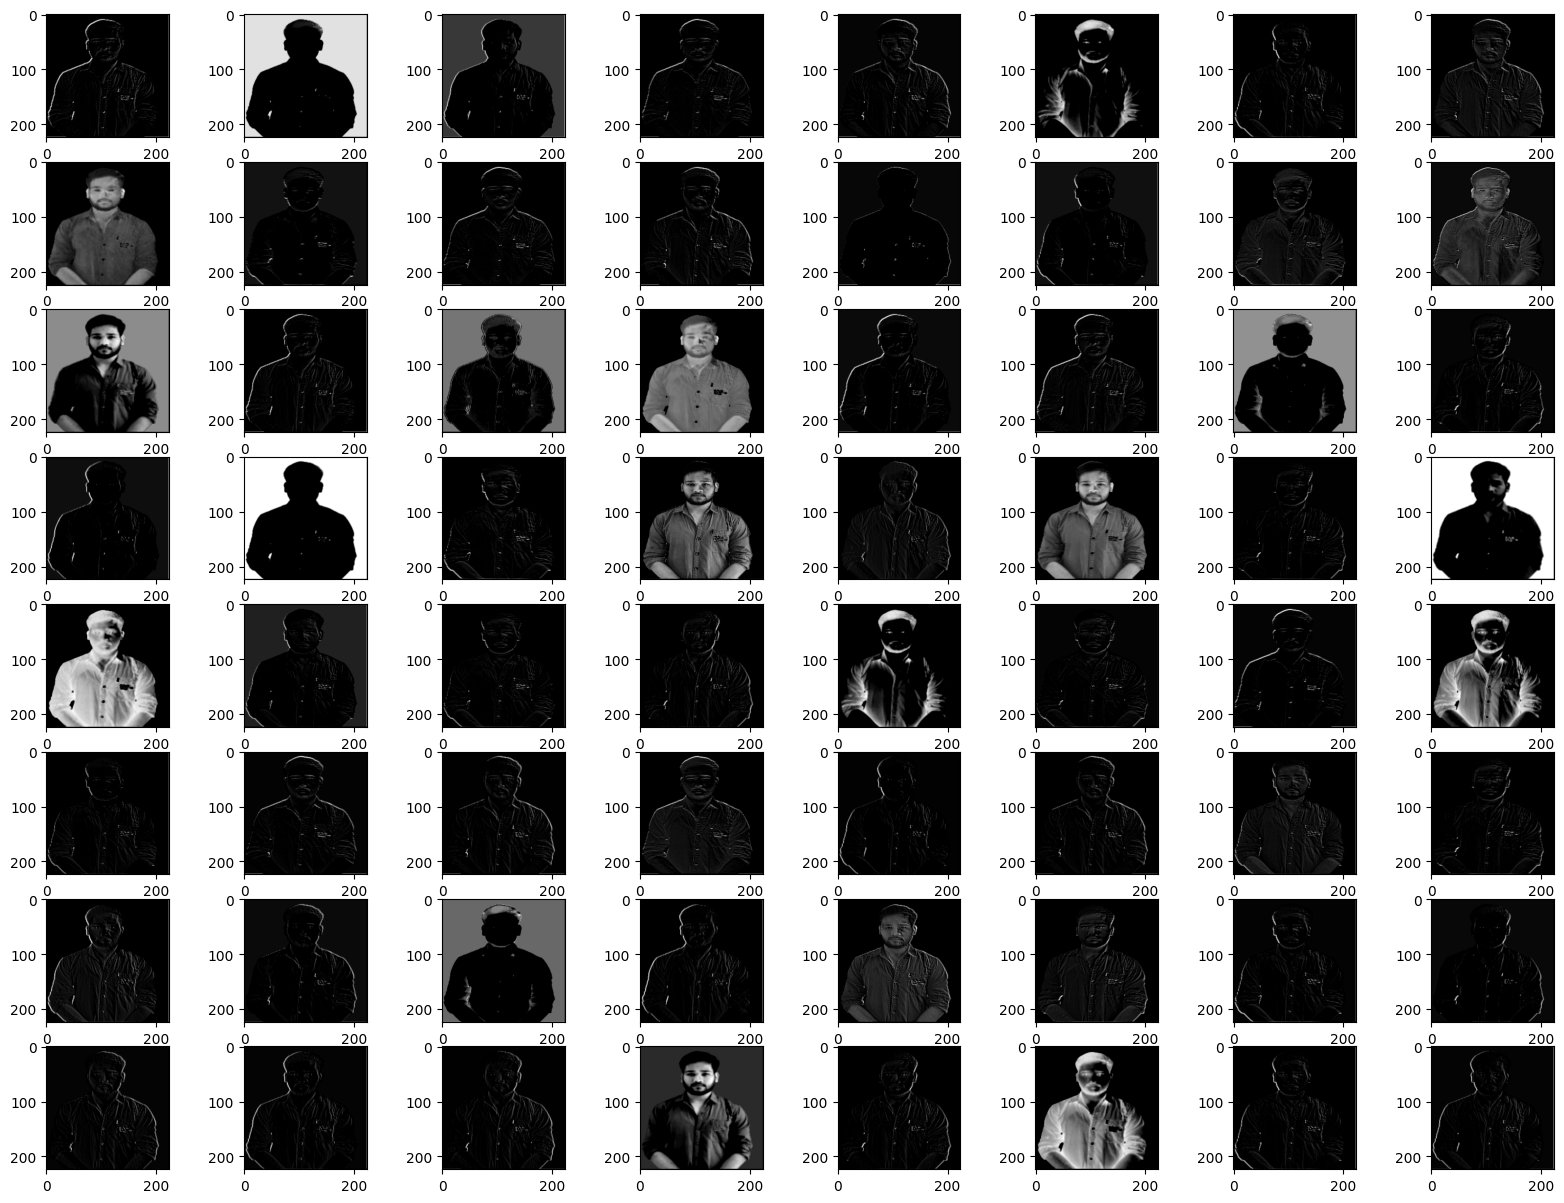

In [18]:
#calculating features_map
features = model.predict(img)

fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')

plt.show()

In [19]:
model2 = VGG16()

In [20]:
layer_index = [ 2, 5 , 9 , 13 , 17]
outputs = [model2.layers[i].output for i in layer_index]

model3 = Model( inputs= model2.inputs, outputs = outputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


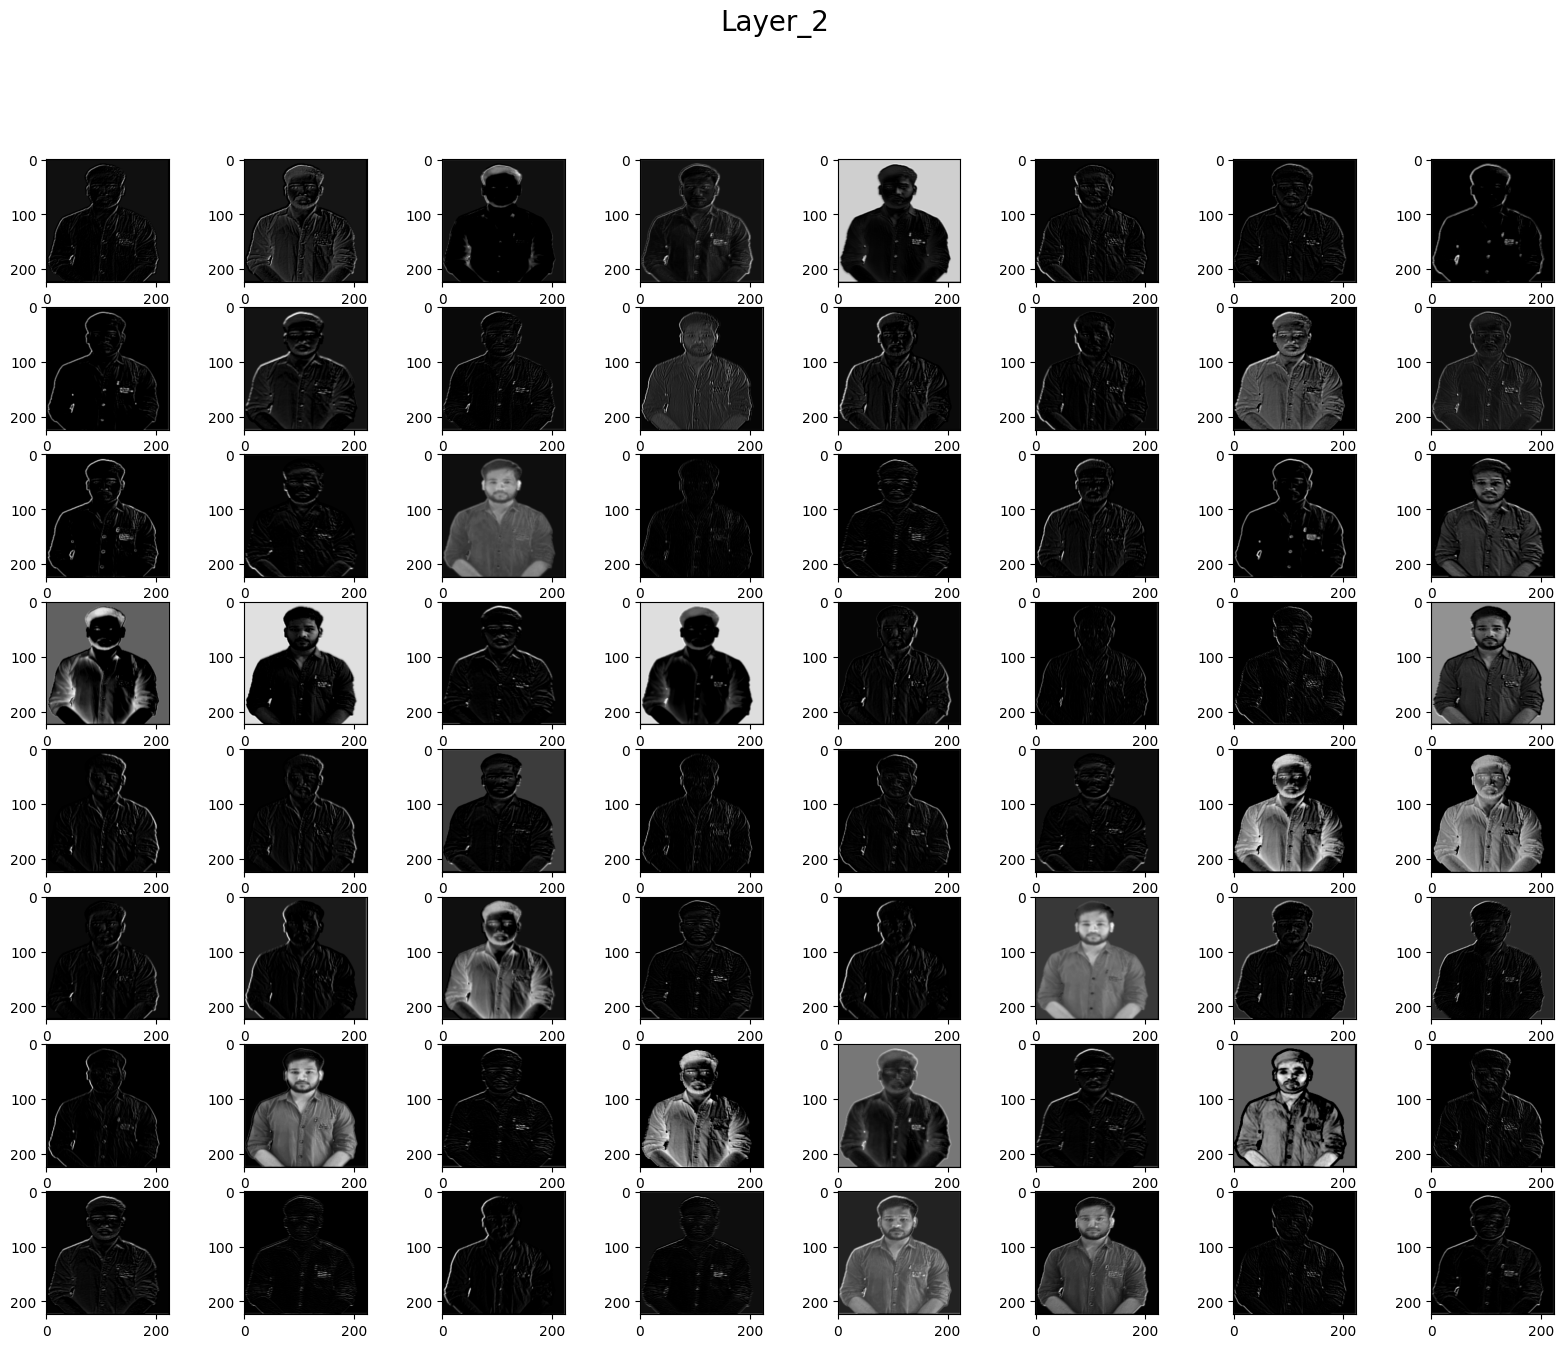

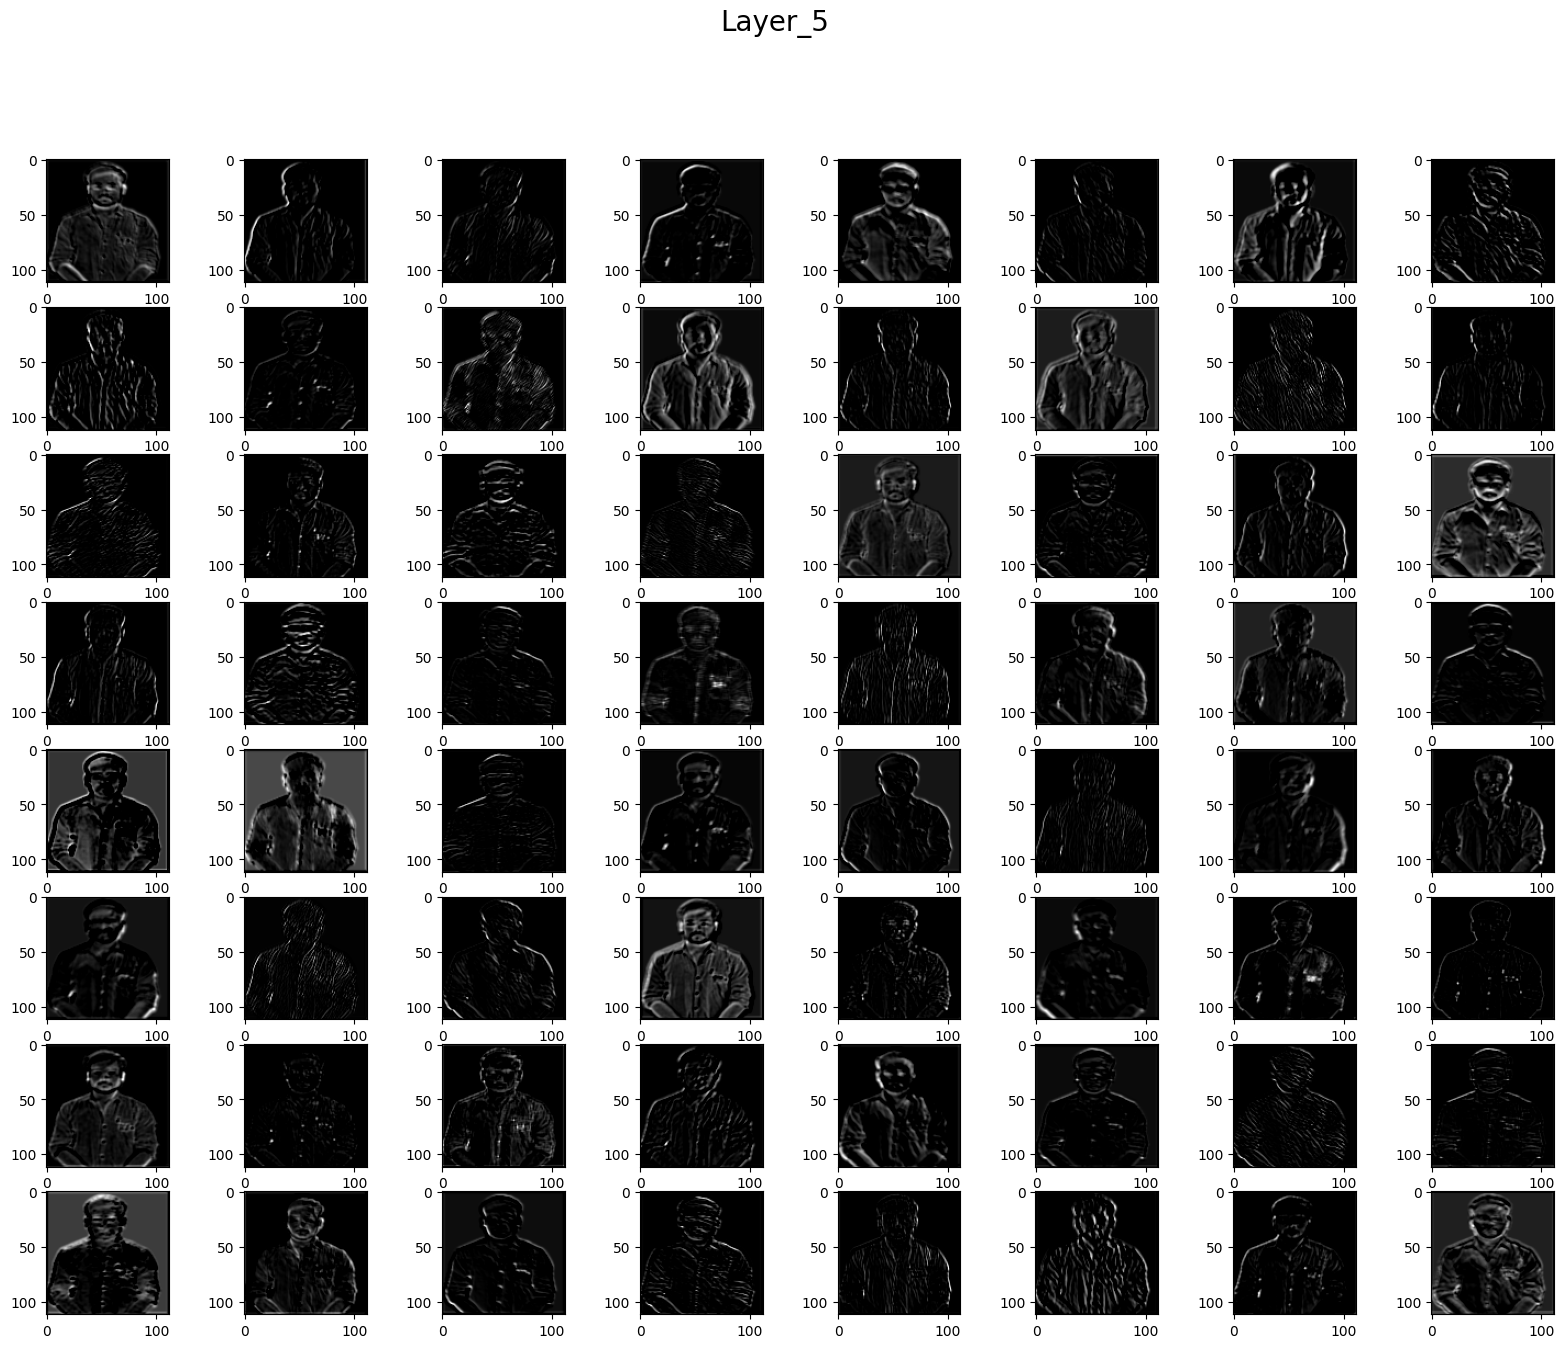

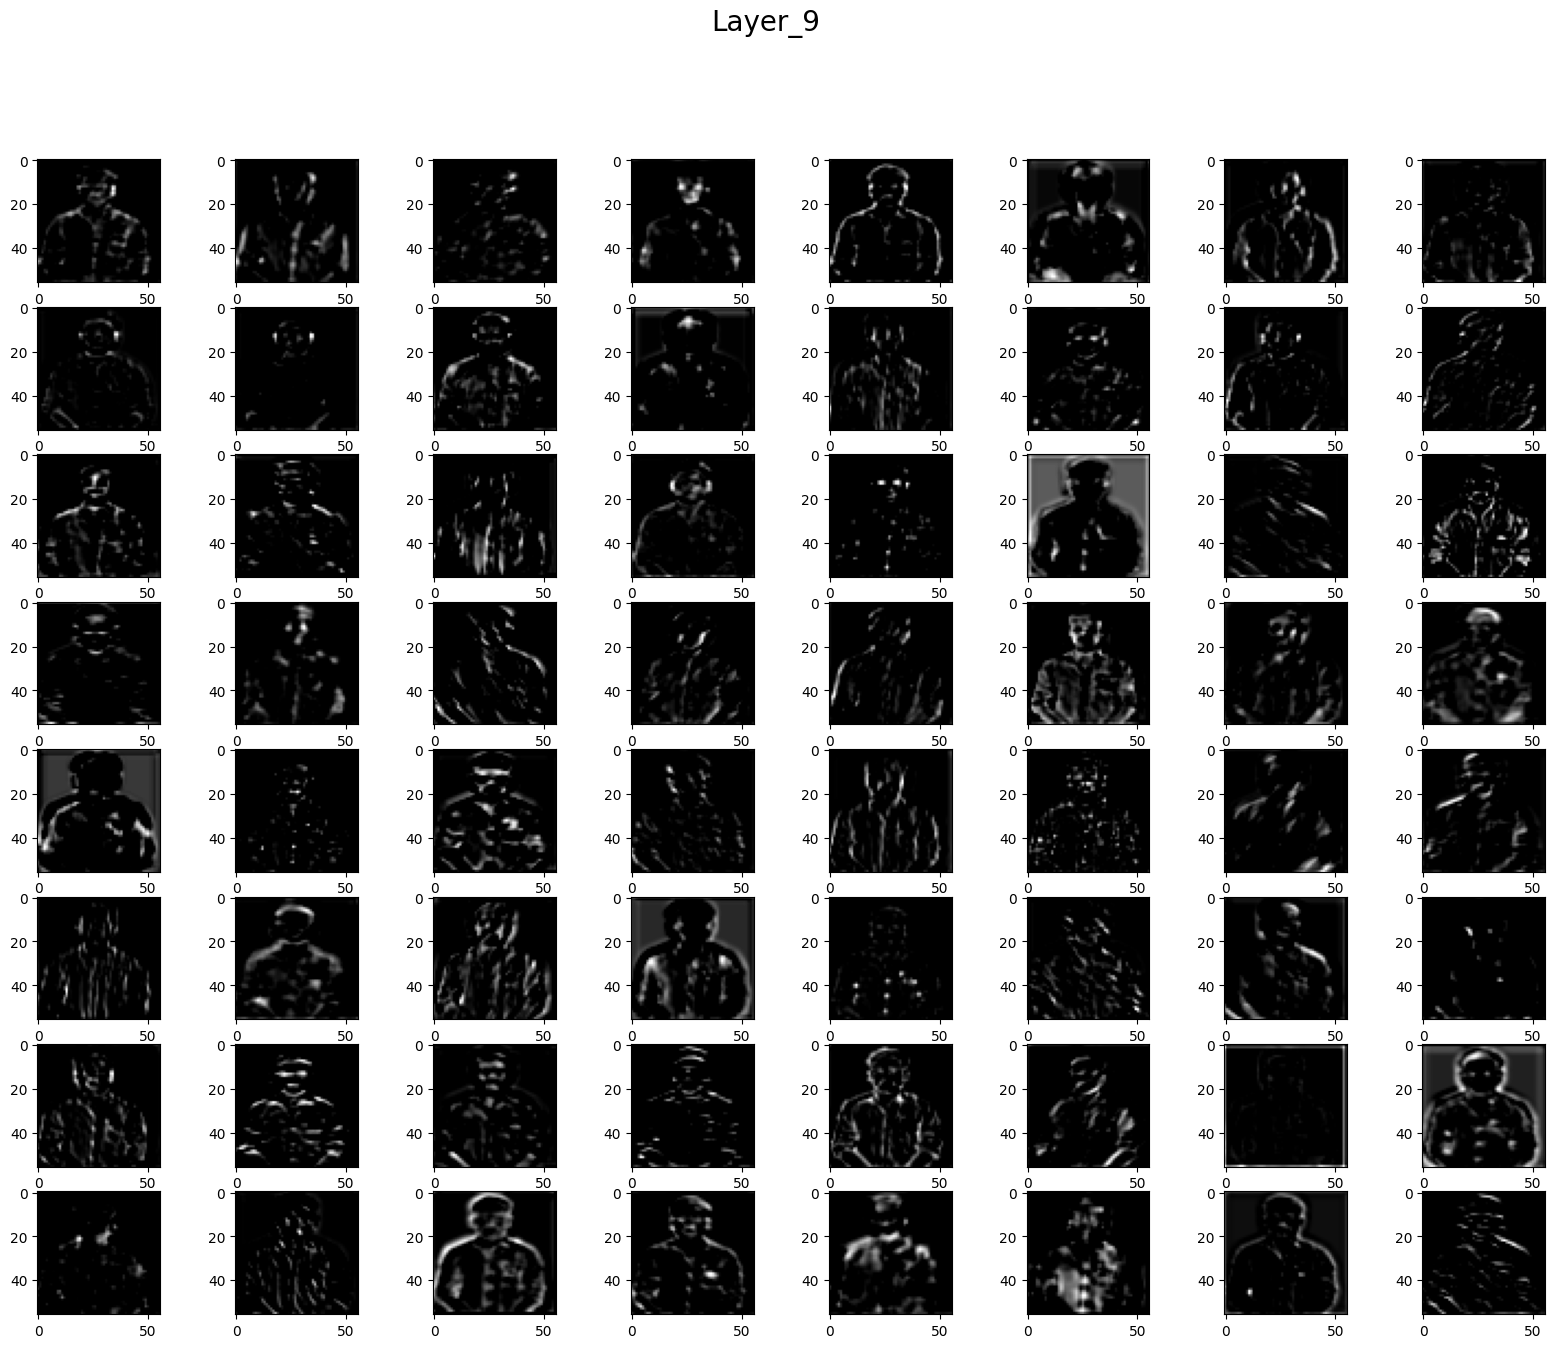

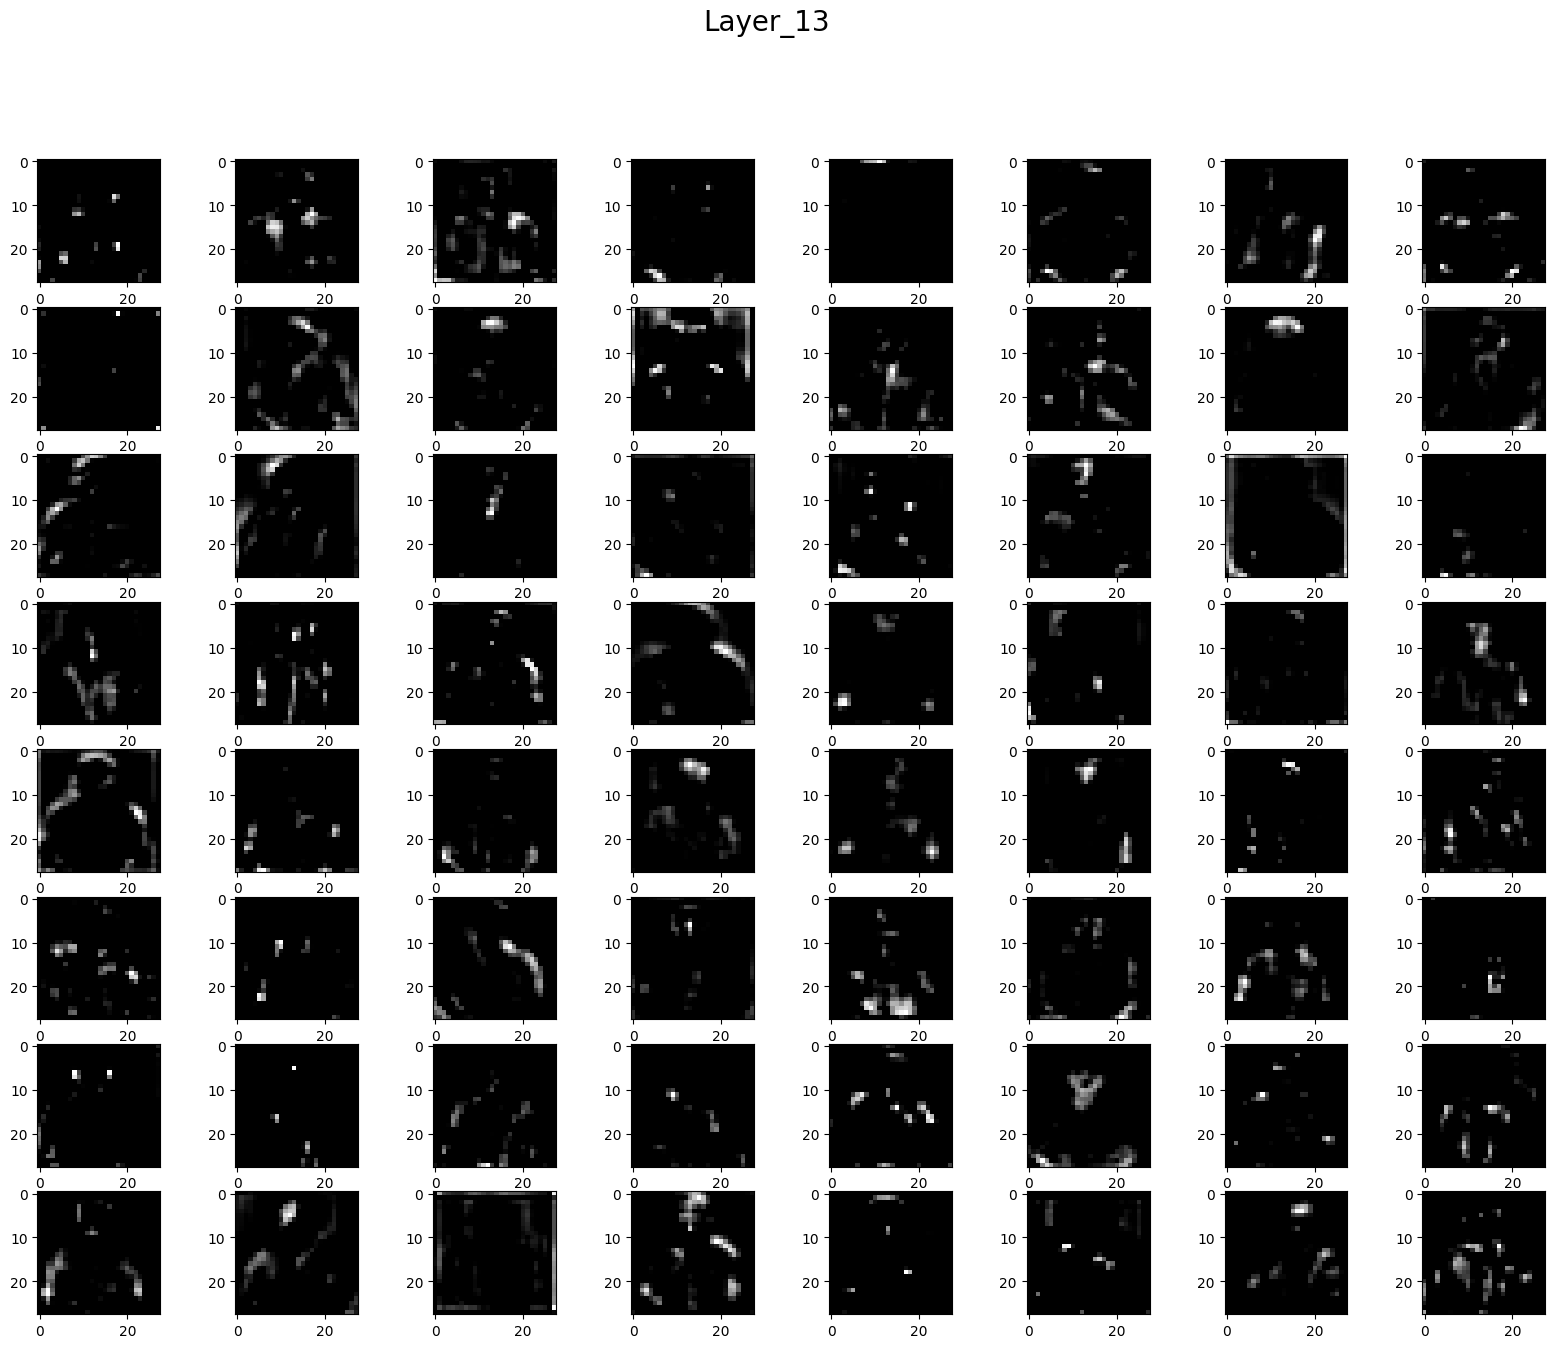

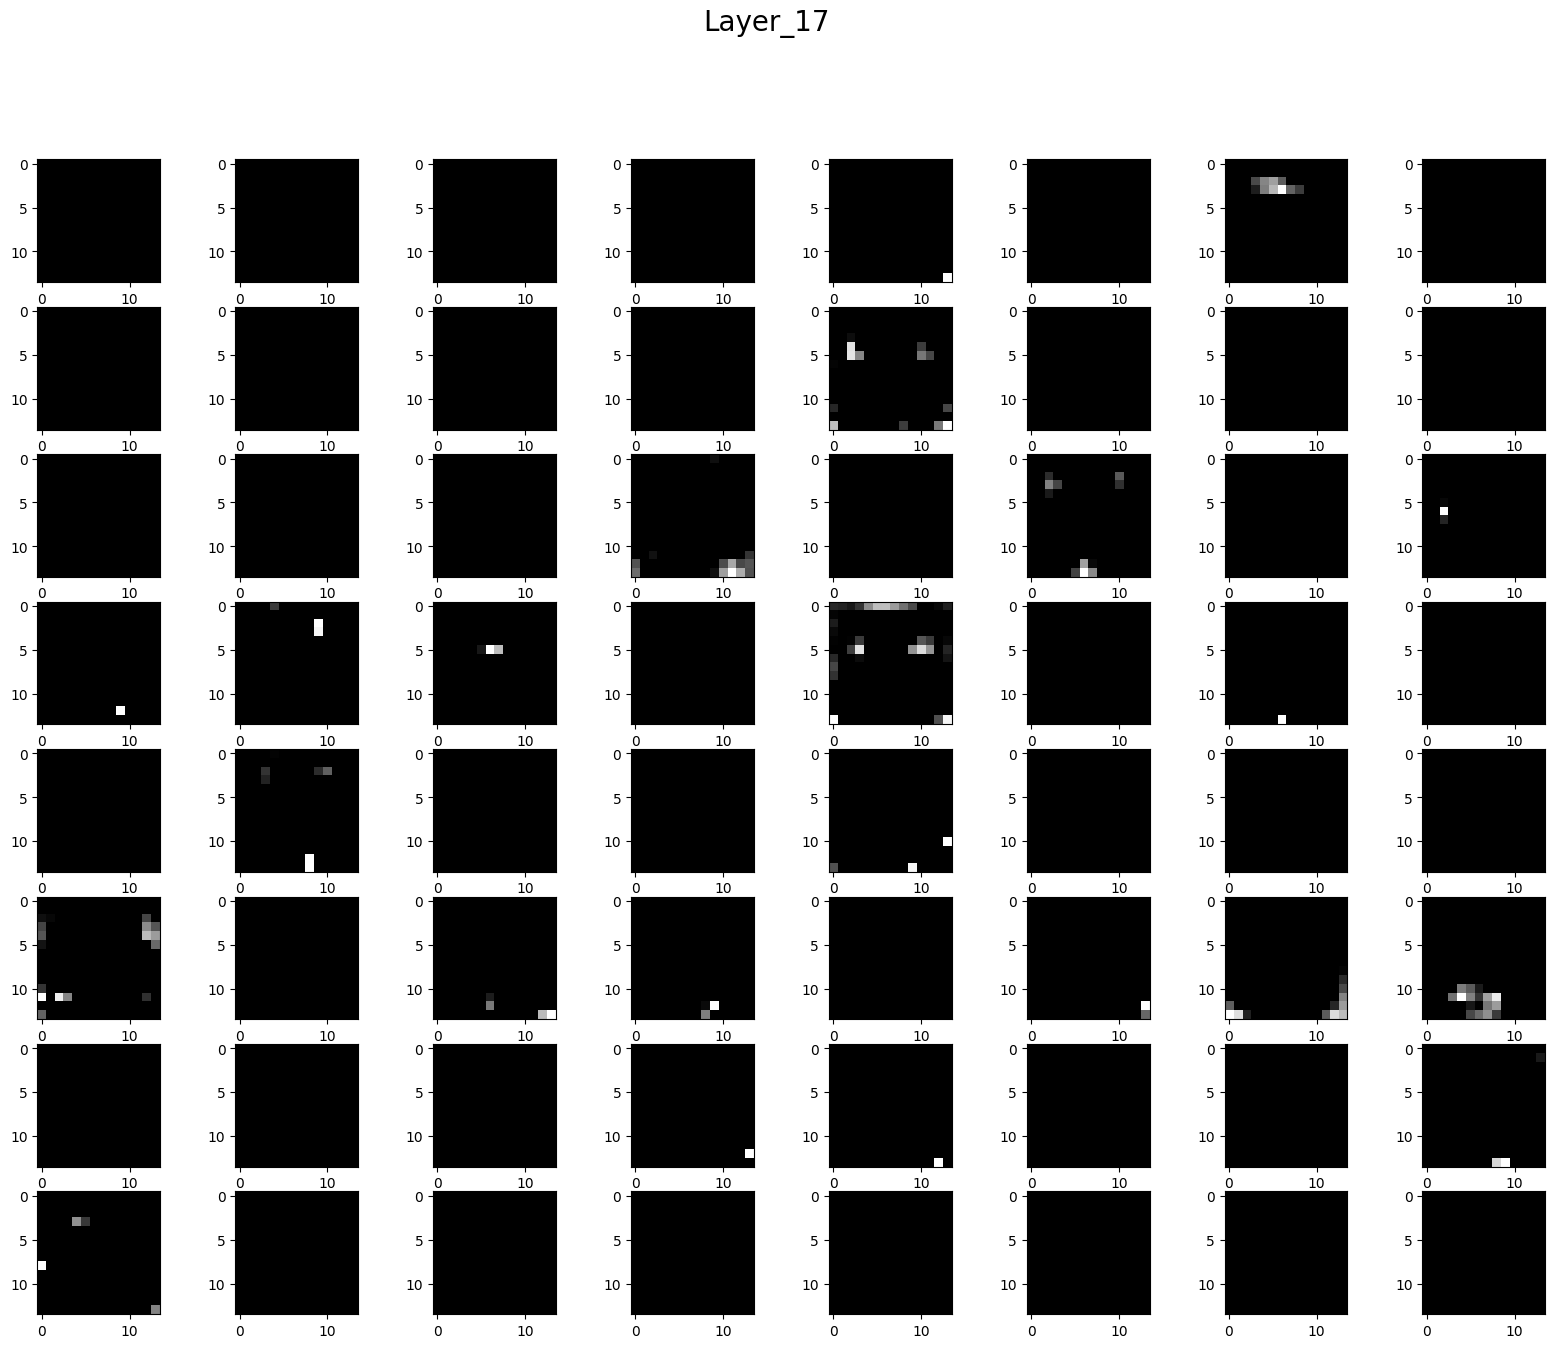

In [21]:
feature_map = model3.predict(img)

for i,fmap in zip(layer_index,feature_map):
    fig = plt.figure(figsize=(20,15))
    fig.suptitle("Layer_{}".format(i) , fontsize=20)
    for i in range(1,features.shape[3]+1):

        plt.subplot(8,8,i)
        plt.imshow(fmap[0,:,:,i-1] , cmap='gray')

plt.show()